## Observations and Insights 

In [423]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
study_results = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
study_results_df = pd.DataFrame(study_results)
study_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [424]:
# Checking the number of mice.
number_of_mice = len(study_results["Mouse ID"])
print(f"There are {number_of_mice} mice")


There are 1893 mice


In [425]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

identifying_duplicates = study_results_df[study_results.duplicated(['Mouse ID', 'Timepoint'])]
identifying_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [426]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_results.loc[study_results["Mouse ID"] == "g989"]

duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [427]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

updated_study_results = study_results_df[study_results_df['Mouse ID'] != "g989"]

updated_study_results_df = pd.DataFrame(updated_study_results)
updated_study_results_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [428]:
# Checking the number of mice in the clean DataFrame.


mouse_count = len(updated_study_results["Mouse ID"].unique())
print(f"The updated mouse count is {mouse_count}")


The updated mouse count is 248


## Summary Statistics

In [429]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = updated_study_results_df.groupby(["Drug Regimen"])
var_tumor_volume = grouped_regimen["Tumor Volume (mm3)"].var()
sem_tumor_volume = grouped_regimen["Tumor Volume (mm3)"].sem()
descriptive_tumor = grouped_regimen["Tumor Volume (mm3)"].describe()

tumor_stats_pd = pd.DataFrame({"Variance":(var_tumor_volume),"Standard Error":(sem_tumor_volume)})
descriptive_tumor_df = pd.DataFrame(descriptive_tumor_volume)

tumor_summary_stats_df = pd.merge(tumor_stats_pd,descriptive_tumor_df, on="Drug Regimen")
tumor_summary_stats_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Variance,Standard Error,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,,,
Capomulin,24.947764,0.329346,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,39.290177,0.469821,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,43.128684,0.492236,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,68.553577,0.603860,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,66.173479,0.596466,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,61.168083,0.581331,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,43.852013,0.544332,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,23.486704,0.320955,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,59.450562,0.573111,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

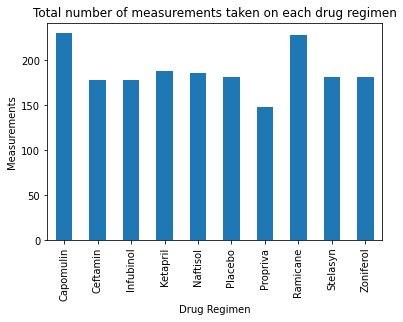

<Figure size 432x288 with 0 Axes>

In [431]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#how many times each regimen appears

regimen = updated_study_results_df.groupby(["Drug Regimen"])

count_measurments = grouped_regimen["Drug Regimen"].count()

measurment_chart = count_measurments.plot(kind='bar')

measurment_chart.set_xlabel("Drug Regimen")
measurment_chart.set_ylabel("Measurements")
measurment_chart.set_title("Total number of measurements taken on each drug regimen")

# regimen = updated_study_results_df["Drug Regimen"].value_counts()
# measurments = updated_study_results_df["Tumor Volume (mm3)"].value_counts()

# regimen_and_volume = regimen.add(measurments, fill_value=0)

# regimen_and_volume.plot(kind="bar", facecolor="red")


# updated_study_results_df[["Drug Regimen","Tumor Volume (mm3)"]]

# regimen_and_volume = regimen_and_volume.set_index("Drug Regimen")

# regimen_and_volume.plot(kind="bar", figsize=(20,3))

plt.show()
plt.tight_layout()


# updated_study_results_df.plot(kind='bar',x="Drug Regimen",y="Tumor Volume (mm3)",color='red')
# plt.show()

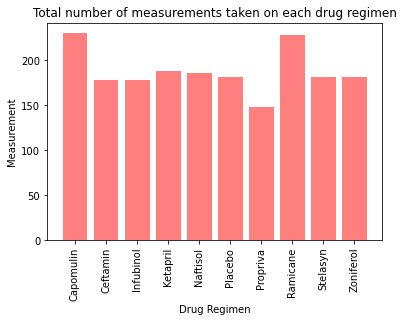

<Figure size 432x288 with 0 Axes>

In [432]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen = updated_study_results_df["Drug Regimen"].value_counts()
measurements = updated_study_results_df["Tumor Volume (mm3)"].value_counts()

regimen_names = updated_study_results_df.groupby(["Drug Regimen"])

count_regimen = regimen_names["Tumor Volume (mm3)"].count()
count_regimen_df = pd.DataFrame(count_regimen)
count_regimen_df.reset_index(level=0, inplace=True)


plt.bar(count_regimen_df["Drug Regimen"],count_regimen_df["Tumor Volume (mm3)"], color="red", alpha=0.5, align="center")




# ax.set_xticklabels( range(0,N,10), rotation=45 )

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, regimen_names, rotation=45 )

plt.xlabel("Drug Regimen")
plt.ylabel("Measurement")
plt.title("Total number of measurements taken on each drug regimen")

plt.xticks(rotation=90)
plt.show()
plt.tight_layout()


# x_axis = np.arange(len(updated_study_results_df["Tumor Volume (mm3)"]))


# plt.bar(x_axis, regimen, color="red", alpha=0.5, align="center" )


# # 
# plt.show

<function matplotlib.pyplot.show(*args, **kw)>

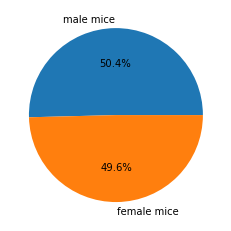

In [433]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_mice = updated_study_results_df.loc[updated_study_results_df["Sex"] =="Male"]
male_mice_count = male_mice["Mouse ID"].nunique()
female_mice = updated_study_results_df.loc[updated_study_results_df["Sex"] =="Female"]
female_mice_count = female_mice["Mouse ID"].nunique()

mouse_count_df = pd.DataFrame({'Gender':("male mice", "female mice") ,'Count':(male_mice_count, female_mice_count)})

plt.pie(mouse_count_df["Count"], labels=mouse_count_df["Gender"],autopct="%1.1f%%")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

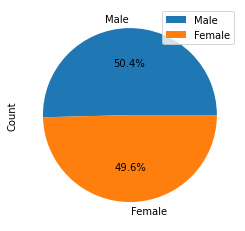

In [434]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_mice = updated_study_results_df.loc[updated_study_results_df["Sex"] =="Male"]
male_mice_count = male_mice["Mouse ID"].nunique()
female_mice = updated_study_results_df.loc[updated_study_results_df["Sex"] =="Female"]
female_mice_count = female_mice["Mouse ID"].nunique()

mouse_count_df = pd.DataFrame({'Gender':("Male", "Female") ,'Count':(male_mice_count, female_mice_count)})


mouse_chart = mouse_count_df.plot(kind="pie", y= 'Count', labels=("Male","Female"), autopct="%1.1f%%")
plt.show



## Quartiles, Outliers and Boxplots

In [435]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

    # Start by getting the last (greatest) timepoint for each mouse
mouse_ID = updated_study_results_df.groupby(["Mouse ID"])
timepoint = mouse_ID["Timepoint"].max()
timepoint_df = pd.DataFrame(timepoint)

timepoint_df.reset_index(level=0, inplace=True)

    # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge_df = pd.merge(updated_study_results_df,timepoint_df, on=["Mouse ID","Timepoint"])
timepoint_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [436]:
    # Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

    # Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
        # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
        tumor_volume = timepoint_merge_df.loc[timepoint_merge_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
        # add subset
        tumor_vol_data.append(tumor_volume) 
        # Determine outliers using upper and lower bounds
        
        treatment_outliers = tumor_volume.quantile([.25,.5,.75])
        lowerq = treatment_outliers[0.25]
        upperq = treatment_outliers[0.75]
        iqr = upperq-lowerq
        print(f"The lower quartile of {treatment} is: {lowerq}")
        print(f"The upper quartile of {treatment} is: {upperq}")
        print(f"The interquartile range of {treatment} is: {iqr}")
        print(f"The the median of {treatment} is: {treatment_outliers[0.5]} ")
     
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {lower_bound} for {treatment} could be outliers.")
        print(f"Values above {upper_bound} for {treatment} could be outliers.")
        
        outlier_treatment = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f"The outliers for {treatment} are: {outlier_treatment}")
        print('---------------------------')

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
The outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
The outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubin

<function matplotlib.pyplot.show(*args, **kw)>

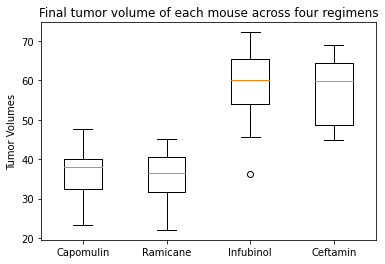

In [437]:
    # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []
for treatment in treatments:
        tumor_volume = timepoint_merge_df.loc[timepoint_merge_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
        tumor_vol_data.append(tumor_volume)    
fig1, ax1 = plt.subplots()
ax1.set_title(f"Final tumor volume of each mouse across four regimens")
ax1.set_ylabel("Tumor Volumes")
ax1.boxplot(tumor_vol_data)
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show

## Line and Scatter Plots

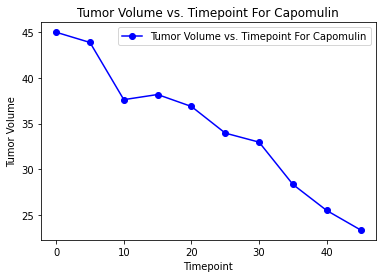

In [438]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


mouse_tumor_vol = updated_study_results_df.loc[updated_study_results_df["Mouse ID"] == "s185","Tumor Volume (mm3)"]
mouse_time_point = updated_study_results_df.loc[updated_study_results_df["Mouse ID"] == "s185","Timepoint"]



plt.plot(mouse_time_point, mouse_tumor_vol, color="blue", label="Tumor Volume vs. Timepoint For Capomulin", marker="o")

plt.legend(loc="best")
plt.title("Tumor Volume vs. Timepoint For Capomulin")
plt.xlabel("Timepoint")

plt.ylabel("Tumor Volume")
plt.show()





<function matplotlib.pyplot.show(*args, **kw)>

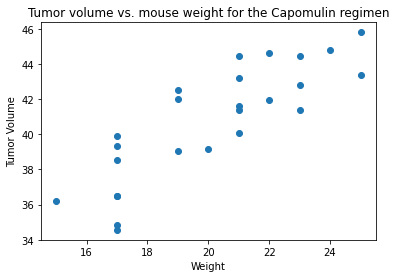

In [439]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume = updated_study_results_df.loc[updated_study_results_df["Drug Regimen"] == "Capomulin"]

mouse_group = avg_tumor_volume.groupby("Mouse ID")
avg_volume = mouse_group ["Tumor Volume (mm3)"].mean()
mouse_weight = mouse_group["Weight (g)"].unique().astype(int)

plt.scatter(mouse_weight,avg_volume)

plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Tumor volume vs. mouse weight for the Capomulin regimen")
plt.show



## Correlation and Regression

The correlation coefficient between Tumor Volume and Mouse Weight is 0.84
The r-squared is: 0.7088568047708717


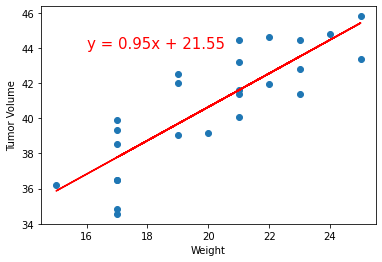

In [442]:
# Calculate the correlation coefficient and 
print(f"The correlation coefficient between Tumor Volume and Mouse Weight is {round(st.pearsonr(mouse_weight,avg_volume)[0],2)}")

# linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_weight
y_values = avg_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()